# Project -Neural Network

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score



### Loading the data

In [3]:
import h5py
h5f = h5py.File('SVHN_single_grey1.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
#Loading the Training ,Testimg and Validation data

X_train=h5f['X_train']
X_test = h5f['X_test']
X_val=h5f['X_val']
y_train=h5f['y_train']
y_test=h5f['y_test']
y_val=h5f['y_val']

In [5]:
#printing the shape and data type
print('Shape of X_Train : ',X_train.shape,"Data Type :",X_train.dtype)
print('Shape of X_Test : ',X_test.shape,"Data Type :",X_test.dtype)
print('Shape of X_Val : ',X_val.shape,"Data Type :",X_val.dtype)
print('Shape of y_Train : ',y_train.shape,"Data Type :",y_train.dtype)
print('Shape of y_Test : ',y_test.shape,"Data Type :",y_test.dtype)
print('Shape of y_Val : ',y_val.shape,"Data Type :",y_val.dtype)

Shape of X_Train :  (42000, 32, 32) Data Type : float32
Shape of X_Test :  (18000, 32, 32) Data Type : float32
Shape of X_Val :  (60000, 32, 32) Data Type : float32
Shape of y_Train :  (42000,) Data Type : uint8
Shape of y_Test :  (18000,) Data Type : uint8
Shape of y_Val :  (60000,) Data Type : uint8


### Visualizing the dataset

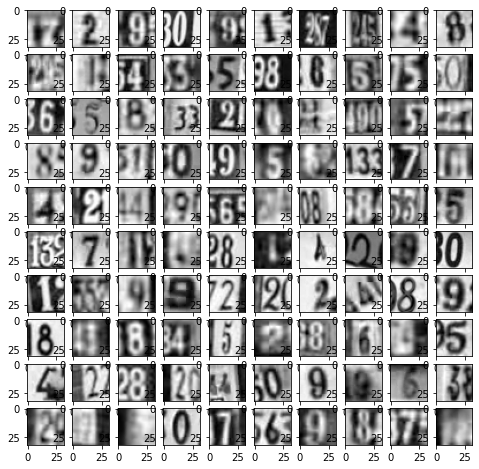

In [7]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range (1,columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)

    plt.imshow(img,cmap='gray')
plt.show()

##### Checking the labels

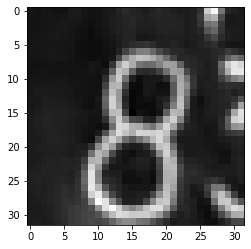

Label : 8


In [8]:
plt.imshow(X_train[234],cmap='gray')
plt.show()
print('Label :',y_train[234])

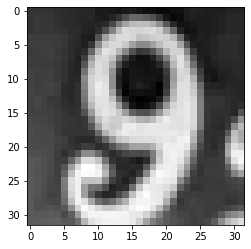

Label : 9


In [9]:
plt.imshow(X_train[2454],cmap='gray')
plt.show()
print('Label :',y_train[2454])

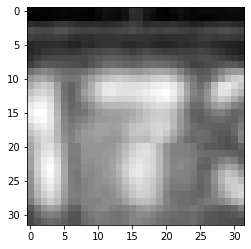

Label : 7


In [10]:
plt.imshow(X_train[34000],cmap='gray')
plt.show()
print('Label :',y_train[34000])

##### Visualizing first 10 Images in the data set 

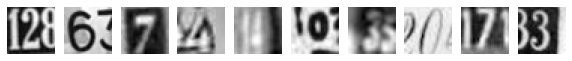

Labels: [2 6 7 4 4 0 3 0 7 3]


In [11]:
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('Labels: %s' % (y_train[0:10]))  

## Data Preprocessing

#### Reshaping

In [12]:
X_train=np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

#### One hot encoding

In [13]:
y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [14]:
#printing the shape 
print('Shape of X_Train : ',X_train.shape)
print('Shape of X_Test : ',X_test.shape)
print('Shape of X_Val : ',X_val.shape)
print('Shape of y_Train : ',y_train.shape)
print('Shape of y_Test : ',y_test.shape)
print('Shape of y_Val : ',y_val.shape)

Shape of X_Train :  (42000, 1024)
Shape of X_Test :  (18000, 1024)
Shape of X_Val :  (60000, 1024)
Shape of y_Train :  (42000, 10)
Shape of y_Test :  (18000, 10)
Shape of y_Val :  (60000, 10)


#### Normalizing the data

In [15]:
#Normalizing the RGB codes by dividing it to the max RGB value
print(X_train.max())
print(X_train.min())

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print(X_train.max())
print(X_train.min())

254.9745
0.0
0.9999
0.0


## Neural Network Classifier



In [16]:
model=Sequential()

In [17]:
#adding input layer
model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
model.add(Activation('relu'))
#hidden layer 1 
model.add(Dense(256,kernel_initializer='he_normal'))
model.add(Activation('relu'))
#hidden layer 2
model.add(Dense(128,kernel_initializer='he_normal'))
model.add(Activation('relu'))
#hidden layer 3
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
#hidden layer 4
model.add(Dense(32,kernel_initializer='he_normal'))
model.add(Activation('relu'))
#output layer
model.add(Dense(10))
model.add(Activation('softmax'))





In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

## Compiling model using cross entropy and adam optimizer

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, validation_data=(X_train,y_train),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 1s 6ms/step - loss: 2.3040 - accuracy: 0.1104 - val_loss: 2.2118 - val_accuracy: 0.1767
Epoch 2/10
210/210 [==============================] - 1s 5ms/step - loss: 1.8538 - accuracy: 0.3213 - val_loss: 1.4762 - val_accuracy: 0.4896
Epoch 3/10
210/210 [==============================] - 1s 4ms/step - loss: 1.3615 - accuracy: 0.5452 - val_loss: 1.2143 - val_accuracy: 0.6067
Epoch 4/10
210/210 [==============================] - 1s 4ms/step - loss: 1.1709 - accuracy: 0.6231 - val_loss: 1.0795 - val_accuracy: 0.6574
Epoch 5/10
210/210 [==============================] - 1s 4ms/step - loss: 1.0602 - accuracy: 0.6628 - val_loss: 1.0146 - val_accuracy: 0.6786
Epoch 6/10
210/210 [==============================] - 1s 4ms/step - loss: 0.9716 - accuracy: 0.6926 - val_loss: 0.9037 - val_accuracy: 0.7199
Epoch 7/10
210/210 [==============================] - 1s 4ms/step - loss: 0.9017 - accuracy: 0.7150 - val_loss: 0.8771 - val_accuracy: 0.7230
Epoch 

#### Classification Accuracy Metrics

In [25]:
y_pred=model.predict_classes(X_test)
print(y_pred)

[8 2 2 ... 7 9 2]


In [26]:
#Confusion matrix
matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(matrix)

[[1342   56   12   49   61   26   63   17  107   81]
 [  39 1453   27   75  116   16   12   38   40   12]
 [  15   55 1398   95   60   32   14   73   26   35]
 [  27   73   63 1206   45  185   10   42   42   26]
 [  28   68   39   36 1467   29   57   12   42   34]
 [  30   49   29  141   43 1309   39   17   63   48]
 [  79   37   16   26  115   98 1330   10  101   20]
 [  29   96  127   66   24   16   18 1387   20   25]
 [  85   51   37   50   97  175  124    9 1089   95]
 [  70   60   43   82   63   72   12   42   81 1279]]


Visualizing the confusion matrix


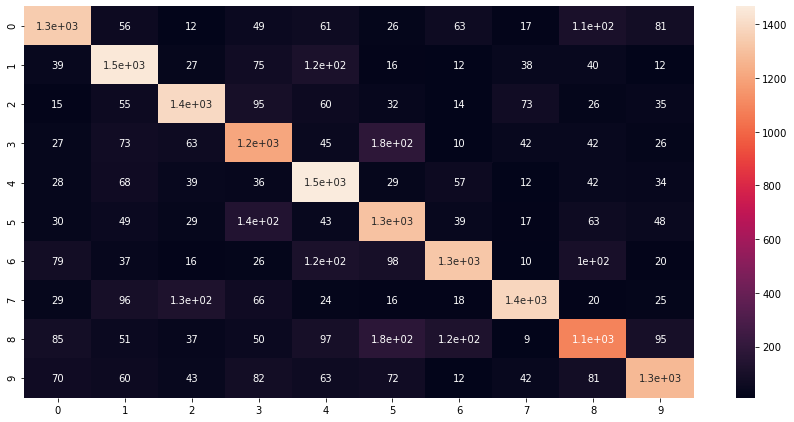

In [27]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred), annot = True)

In [28]:
#Classification report
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1814
           1       0.73      0.79      0.76      1828
           2       0.78      0.78      0.78      1803
           3       0.66      0.70      0.68      1719
           4       0.70      0.81      0.75      1812
           5       0.67      0.74      0.70      1768
           6       0.79      0.73      0.76      1832
           7       0.84      0.77      0.80      1808
           8       0.68      0.60      0.64      1812
           9       0.77      0.71      0.74      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



- Accuracy is 75%

### Changing the learning rate 

In [30]:
adam = tensorflow.keras.optimizers.Adam(lr = 0.0001)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 1s 6ms/step - loss: 0.7506 - accuracy: 0.7643 - val_loss: 0.7540 - val_accuracy: 0.7646
Epoch 2/100
210/210 [==============================] - 1s 5ms/step - loss: 0.7123 - accuracy: 0.7747 - val_loss: 0.6583 - val_accuracy: 0.7958
Epoch 3/100
210/210 [==============================] - 1s 5ms/step - loss: 0.6903 - accuracy: 0.7827 - val_loss: 0.6892 - val_accuracy: 0.7856
Epoch 4/100
210/210 [==============================] - 1s 5ms/step - loss: 0.6726 - accuracy: 0.7882 - val_loss: 0.6536 - val_accuracy: 0.7959
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 0.6372 - accuracy: 0.7984 - val_loss: 0.6323 - val_accuracy: 0.8029
Epoch 6/100
210/210 [==============================] - 1s 5ms/step - loss: 0.6229 - accuracy: 0.8030 - val_loss: 0.6303 - val_accuracy: 0.8051
Epoch 7/100
210/210 [==============================] - 1s 5ms/step - loss: 0.6007 - accuracy: 0.8106 - val_loss: 0.6104 - val_accuracy: 0.8106

#### Classification Accuracy Metrics

In [31]:
y_pred=model.predict_classes(X_test)
print(y_pred)

[8 7 2 ... 7 9 2]


In [32]:
matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(matrix)

[[1551   34   11   19   33    9   29   18   33   77]
 [  29 1526   28   35   58   19   20   42   39   32]
 [  15   22 1495   53   31   12    9   71   28   67]
 [  17   24   38 1395   29   94   14   30   32   46]
 [  14   36   31   28 1578   16   23   10   29   47]
 [  21   20   16  117   20 1397   47    8   75   47]
 [  40   23   16   17   39   71 1436    8  143   39]
 [  17   57   55   47   21   10    6 1560   13   22]
 [  28   43   23   47   40   50   52    7 1441   81]
 [  42   28   23   35   33   46   11   26   51 1509]]


Visualizing the confusion matrix


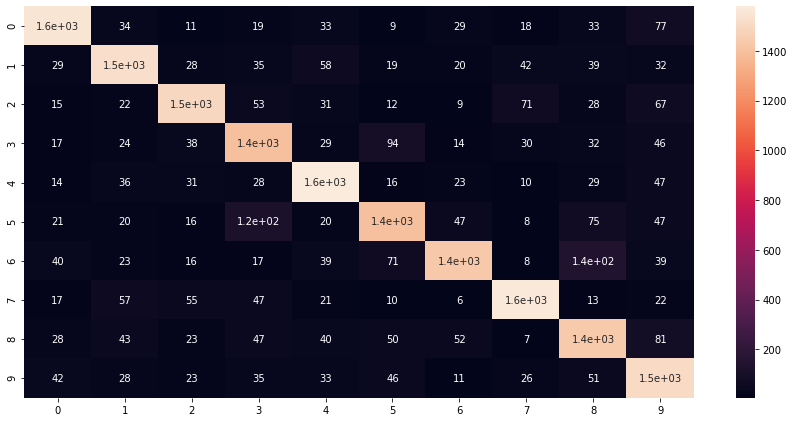

In [33]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred), annot = True)

In [34]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1814
           1       0.84      0.83      0.84      1828
           2       0.86      0.83      0.84      1803
           3       0.78      0.81      0.79      1719
           4       0.84      0.87      0.85      1812
           5       0.81      0.79      0.80      1768
           6       0.87      0.78      0.83      1832
           7       0.88      0.86      0.87      1808
           8       0.76      0.80      0.78      1812
           9       0.77      0.84      0.80      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



- Changed the learning rate in Adam optimizer and trained the dataset.
- Accuracy has increased to 92 %

### Implementing batch normalization for training the neural network

In [52]:
batch_model = Sequential()

In [53]:
# Adding Batch normalization layer

#adding input layer
batch_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))

#Adding BatchNormalization Layer
batch_model.add(BatchNormalization())

batch_model.add(Activation('relu'))
#hidden layer 1 
batch_model.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))
#hidden layer 2
batch_model.add(Dense(128,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))
#hidden layer 3
batch_model.add(Dense(64,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))
#hidden layer 4
batch_model.add(Dense(32,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
batch_model.add(BatchNormalization())
batch_model.add(Activation('relu'))
#output layer
batch_model.add(Dense(10))
batch_model.add(Activation('softmax'))



In [54]:
batch_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_18 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
activation_19 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [55]:
adam = optimizers.Adam(lr = 0.0001)
batch_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history_1 = batch_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 10ms/step - loss: 2.1278 - accuracy: 0.2508 - val_loss: 2.1193 - val_accuracy: 0.2562
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 1.6190 - accuracy: 0.4941 - val_loss: 1.6756 - val_accuracy: 0.4677
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 1.3130 - accuracy: 0.6237 - val_loss: 1.3797 - val_accuracy: 0.5938
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 1.1156 - accuracy: 0.6869 - val_loss: 1.2316 - val_accuracy: 0.6479
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 0.9789 - accuracy: 0.7232 - val_loss: 1.1843 - val_accuracy: 0.6441
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8695 - accuracy: 0.7524 - val_loss: 1.0818 - val_accuracy: 0.6705
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 0.7875 - accuracy: 0.7739 - val_loss: 0.9775 - val_accuracy: 0.705

In [48]:
y_pred=batch_model.predict_classes(X_test)
print(y_pred)

[2 2 2 ... 7 9 2]


In [49]:
#Confusion matrix
matrix = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred)
print(matrix)

[[1126   78  133   31  114   16   85   15   46  170]
 [  12 1347  100   47  214   15   10   22   21   40]
 [  14   33 1500   34   77   27    9   35   16   58]
 [  10   50  133 1052   73  200   24   16   79   82]
 [  13   77   82   19 1439   42   29   12   37   62]
 [   8   27   78  107   59 1271   65    8   64   81]
 [  40   39   85   29  141  120 1169   16  131   62]
 [  15  100  266   53   82   18   11 1201   10   52]
 [  26   44  125   62  130   90   71   14 1107  143]
 [  20   47  133   80   94   58   19   17   31 1305]]


Visualizing the confusion matrix


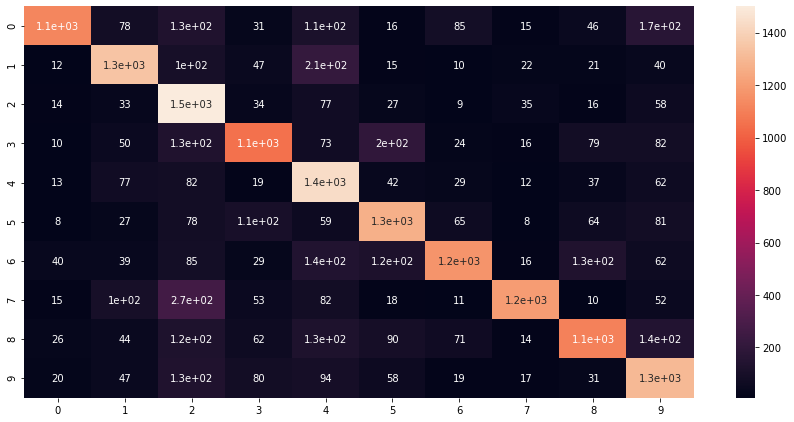

In [50]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred), annot = True)

In [51]:
#Classification report
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1814
           1       0.73      0.74      0.73      1828
           2       0.57      0.83      0.68      1803
           3       0.69      0.61      0.65      1719
           4       0.59      0.79      0.68      1812
           5       0.68      0.72      0.70      1768
           6       0.78      0.64      0.70      1832
           7       0.89      0.66      0.76      1808
           8       0.72      0.61      0.66      1812
           9       0.64      0.72      0.68      1804

    accuracy                           0.70     18000
   macro avg       0.72      0.70      0.70     18000
weighted avg       0.72      0.70      0.70     18000



- Implemented batch normalization
- Accuracy is  85 %

## Testing Neural Network on test data

In [58]:
model_final = Sequential()

In [59]:


#adding input layer
model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))

#Adding BatchNormalization Layer
model_final.add(BatchNormalization())

model_final.add(Activation('relu'))
#hidden layer 1 
model_final.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
#hidden layer 2
model_final.add(Dense(128,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
#hidden layer 3
model_final.add(Dense(64,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
#hidden layer 4
model_final.add(Dense(32,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
#output layer
model_final.add(Dense(10))
model_final.add(Activation('softmax'))




In [60]:
model_final.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
activation_24 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
activation_25 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)              

In [61]:
adamm = optimizers.Adam(lr=0.0001)
# compiling the ANN classifier
model_final.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [62]:
history_final = model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 8ms/step - loss: 1.5069 - accuracy: 0.5125 - val_loss: 1.8036 - val_accuracy: 0.3896
Epoch 2/100
210/210 [==============================] - 2s 8ms/step - loss: 0.9207 - accuracy: 0.7139 - val_loss: 1.8102 - val_accuracy: 0.3937
Epoch 3/100
210/210 [==============================] - 2s 8ms/step - loss: 0.7584 - accuracy: 0.7639 - val_loss: 1.6192 - val_accuracy: 0.4643
Epoch 4/100
210/210 [==============================] - 2s 8ms/step - loss: 0.6658 - accuracy: 0.7909 - val_loss: 1.4852 - val_accuracy: 0.5220
Epoch 5/100
210/210 [==============================] - 2s 8ms/step - loss: 0.6024 - accuracy: 0.8097 - val_loss: 1.3076 - val_accuracy: 0.5858
Epoch 6/100
210/210 [==============================] - 2s 8ms/step - loss: 0.5440 - accuracy: 0.8277 - val_loss: 1.3837 - val_accuracy: 0.5671
Epoch 7/100
210/210 [==============================] - 2s 8ms/step - loss: 0.5095 - accuracy: 0.8380 - val_loss: 1.0804 - val_accuracy: 0.6548

In [63]:
results_final = model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

563/563 [==============================] - 1s 1ms/step - loss: 1.2286 - accuracy: 0.7844
Test accuracy :  0.7844444513320923


In [64]:
y_pred=model_final.predict_classes(X_test)
print(y_pred)



[0 7 2 ... 7 9 2]


Visualizing the confusion matrix


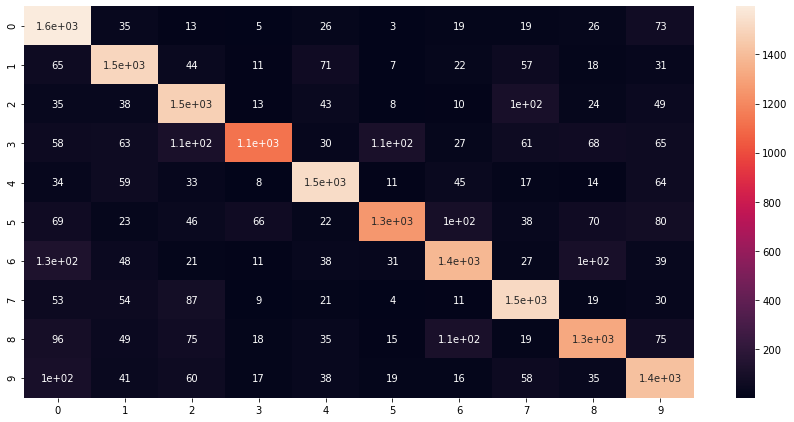

In [65]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=y_pred), annot = True)

In [66]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79      1814
           1       0.79      0.82      0.80      1828
           2       0.75      0.82      0.78      1803
           3       0.88      0.65      0.75      1719
           4       0.82      0.84      0.83      1812
           5       0.86      0.71      0.78      1768
           6       0.79      0.75      0.77      1832
           7       0.79      0.84      0.82      1808
           8       0.78      0.73      0.75      1812
           9       0.74      0.78      0.76      1804

    accuracy                           0.78     18000
   macro avg       0.79      0.78      0.78     18000
weighted avg       0.79      0.78      0.78     18000



## Predicting Images using Testing Data Set

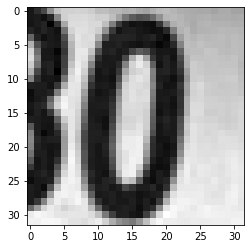

Predicted Digit :  0


In [67]:
#image 1

plt.imshow(X_test[60].reshape(32,32),cmap='gray')
plt.show()
print('Predicted Digit : ' , y_pred[60])

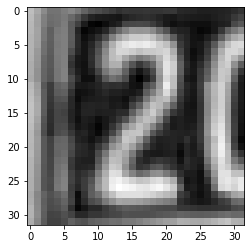

Predicted Digit :  2


In [68]:
#image 2

plt.imshow(X_test[333].reshape(32,32),cmap='gray')
plt.show()
print('Predicted Digit : ' , y_pred[333])

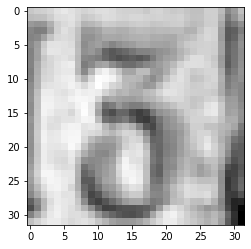

Predicted Digit :  3


In [69]:
#image 3

plt.imshow(X_test[6543].reshape(32,32),cmap='gray')
plt.show()
print('Predicted Digit : ' , y_pred[6543])

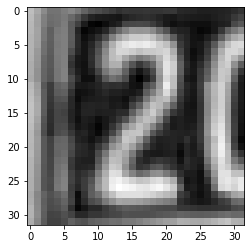

Predicted Digit :  2


In [70]:
#image 4

plt.imshow(X_test[333].reshape(32,32),cmap='gray')
plt.show()
print('Predicted Digit : ' , y_pred[333])

## Conclusion

- Trained Neural Network model with the given dataset
- Training was done using Adam Optimizer and cross entropy with RELU as Activation Layer
- Training was again done using Adam Optimizer and cross entropy with a learning rate of 0.0001
- Testing was done on the test data using Adam Optimizers and batch normalization
- Test data gave 98 % accuracy in training data and 78% in testing data which is overfitting
- The predicting of the images from the testing data set depitcs the images correctly.

